In [1]:
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-10-04 08:54:45--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-10-04 08:54:46 (3.54 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


9/9 - 0s - loss: 3438.2705 - mae: 3438.2705 - mse: 51895436.0000 - 41ms/epoch - 5ms/step
Testing set Mean Abs Error: 3438.27 expenses
Testing set Mean Squared Error: 51895436.00 expenses^2
9/9 [==============================] - 0s 2ms/step


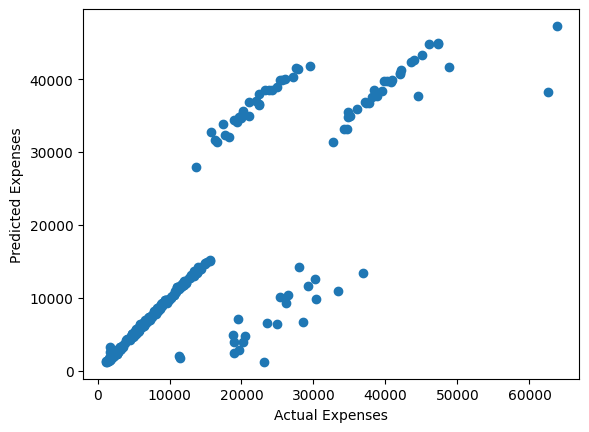

In [26]:


# Convert categorical data to numbers
# Assuming 'sex' 'smoker and 'region' are categorical variables, you can use label encoding
dataset['sex'] = dataset['sex'].replace({'female': 0, 'male': 1})
dataset['smoker'] = dataset['smoker'].replace({'no': 0, 'yes': 1})
dataset['region'] = dataset['region'].replace({'southwest':0 , 'northwest':1, 'southeast':2, 'northeast':3})

# Split the dataset into train and test sets
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# Separate the labels (expenses) from the datasets
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

# Create a regression model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae','mse'])

# Train the model
history = model.fit(train_dataset, train_labels, epochs=400, validation_split=0.2, verbose=0)

# Evaluate the model on the test dataset
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))
print("Testing set Mean Squared Error: {:5.2f} expenses^2".format(mse))

# Predict expenses using the test dataset
predictions = model.predict(test_dataset).flatten()

# Plot the predictions against the actual expenses
plt.scatter(test_labels, predictions)
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.show()


9/9 - 0s - loss: 3438.2705 - mae: 3438.2705 - mse: 51895436.0000 - 55ms/epoch - 6ms/step
Testing set Mean Abs Error: 3438.27 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


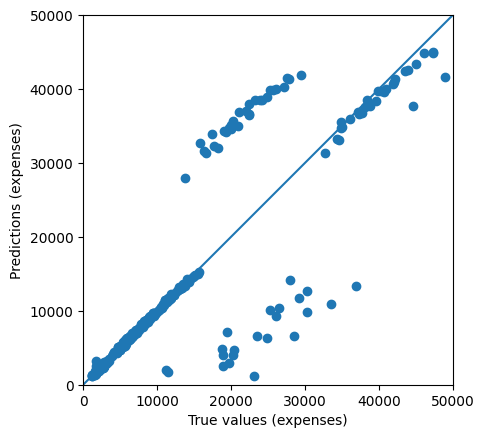

In [27]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
